## Towards Identity Anonymization on Graphs (As written by Terzi and Lui on K-Degree annonymity)

Student Name: Moses Mbabaali, Matricola:4846019
Unit: Data Protection and Privacy. 
Teachers: Prof. Alesio Merlo and Mr. Davide Caputo

In this project i am going to be working through the data annoymization paper presented in the DPP class known as "Towards Identity Anonymization on Graphs". A good amount of the work was implimentented in the class using the greedy algorithm approach. My focus will mainly be based on the dynamic programming aspect. Then performance will be taken into consideration for both algorithms. 

In [1]:
#The libraries to be used 
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt

### The graph problem.
Today there data comes in many shapes and sizes, lots of it is being produced everyday. But this data is not supposed to stay on servers, its supposed to be used. But its usage brings other challenges, privacy. How can the already available data be mined while the privacy of the owners is kept intact and yet useful information extracted. In this project we are going to to examine the available avenues available to make social network data annoymus. This data is under normal circumstances does not come in tabular form, but instead it comes in graphs. Hence graph anonymisation. There are several ways to annoymise graph data, namely GraphModification, Graph Generalization or clustering, Privacy aware graph computation, Differential privacy approaches and Hybrid annoymity Methods. In our case we are going to be focusing mainly on the Graph modification part using the k-degree method. These approaches are deverived from the paper by "Towards Identity Anonymization on Graphs" as written by Terzi and Lui. There are 2 main algorithms in the paper that is the Greedy and the Dymnamic. Both are going to be implimented and the produced results compared.

### Greedy algorithm.

In [256]:
#Greedy Solution. 
def compute_I(d):
    from_d_to_i = d[0]
    result = 0
    for from_d_to_j in d:
        result += from_d_to_i - from_d_to_j
    return result    


def c_new(d,k):   
    t = d[k:min(len(d), 2*k-1)]
    cost_c = compute_I(t)
    return cost_c


def c_merge(d, d1, k):
    cost_c_merge = d1-d[k]+compute_I(d[k+1:min(len(d),2*k)])
    return cost_c_merge


def greedy(array_deg, k_deg,ini_pos, extension):
    
    if ini_pos + extension >= len(array_deg)-1:
        for i in range(ini_pos,len(array_deg)):
            array_deg[i] = array_deg[ini_pos]
            return array_deg
    else:
        d1 = array_deg[ini_pos]
        cost_cmerge = c_merge(array_deg,d1,ini_pos+extension)
        c_new_cost = c_new(array_deg,ini_pos+extension)

        if cost_cmerge > c_new_cost:
            for i in range(ini_pos,ini_pos+extension):
                array_deg[i] = d1
            
            return greedy(array_deg,k_deg,ini_pos+extension,k_deg)
        else:
            return greedy(array_deg,k_deg,ini_pos,extension+1)
        
        
def construct_graph(tab_index, anonymized_degree):

    graph = nx.Graph()
    if sum(anonymized_degree) % 2 == 1:
        return 0

    while True:
        if not all(di >= 0 for di in anonymized_degree):
            return -1
        if all(di == 0 for di in anonymized_degree):
            return graph
        v = np.random.choice((np.where(np.array(anonymized_degree) > 0))[0])
        dv = anonymized_degree[v]
        anonymized_degree[v] = 0
        for index in np.argsort(anonymized_degree)[-dv:][::-1]:
            if index == v:
                return -2
            if not graph.has_edge(tab_index[v], tab_index[index]):
                graph.add_edge(tab_index[v], tab_index[index])
                anonymized_degree[index] = anonymized_degree[index] - 1     

## Test operation of greedy algorithm on the friends graph dataset. 

In [271]:
G= nx.Graph()
with open('data/graph_friend_100_10_100.csv') as f: 
    line = f.readlines()
lines = [i.strip() for i in line]
for j in lines: 
    names = j.split(",")
    start_node = names[0]
    if start_node not in G:
        G.add_node(start_node)
    for k in range(1,len(names)):
        node_to_add = names[k]
        if node_to_add not in G:
            G.add_node(node_to_add)
        G.add_edge(start_node,node_to_add)

In [272]:
test = [degs[1] for degs in G.degree()]
array_index = np.argsort(test)[::-1]
array_deg = np.sort(test)[::-1]

In [273]:
greedy(array_deg,4,0,4)

array([97, 97, 97, 97, 83, 83, 83, 83, 75, 75, 75, 75, 75, 75, 65, 65, 65,
       65, 64, 64, 64, 64, 64, 64, 62, 62, 62, 62, 62, 58, 58, 58, 58, 56,
       56, 56, 56, 56, 56, 53, 53, 53, 53, 53, 51, 51, 51, 51, 51, 49, 49,
       49, 49, 49, 49, 45, 45, 45, 45, 43, 43, 43, 43, 43, 41, 41, 41, 41,
       38, 38, 38, 38, 38, 38, 38, 38, 33, 33, 33, 33, 33, 30, 30, 30, 30,
       30, 25, 25, 25, 25, 17, 17, 17, 17, 17, 17, 12, 11, 10, 10])

In [266]:
results_greedy = greedy(array_deg,4,0,4)

In [267]:
gra_ph = construct_graph(array_index, results_greedy)

In [268]:
gra_ph

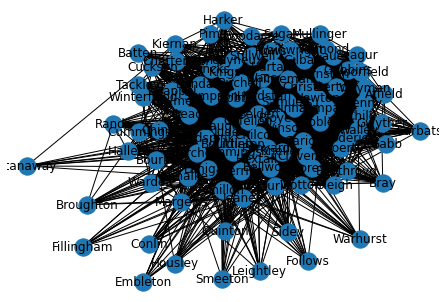

In [269]:
#Original graph
nx.draw(G, with_labels = True)

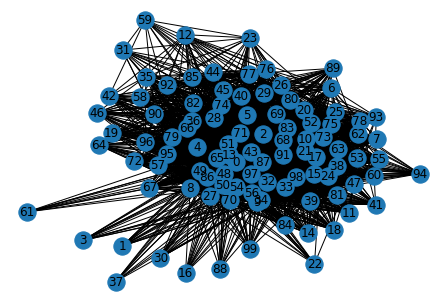

In [274]:
#Annoymised graph
nx.draw(gra_ph,with_labels = True)

Text(0.5, 1.0, 'Anonymised Friends Graph Greedy')

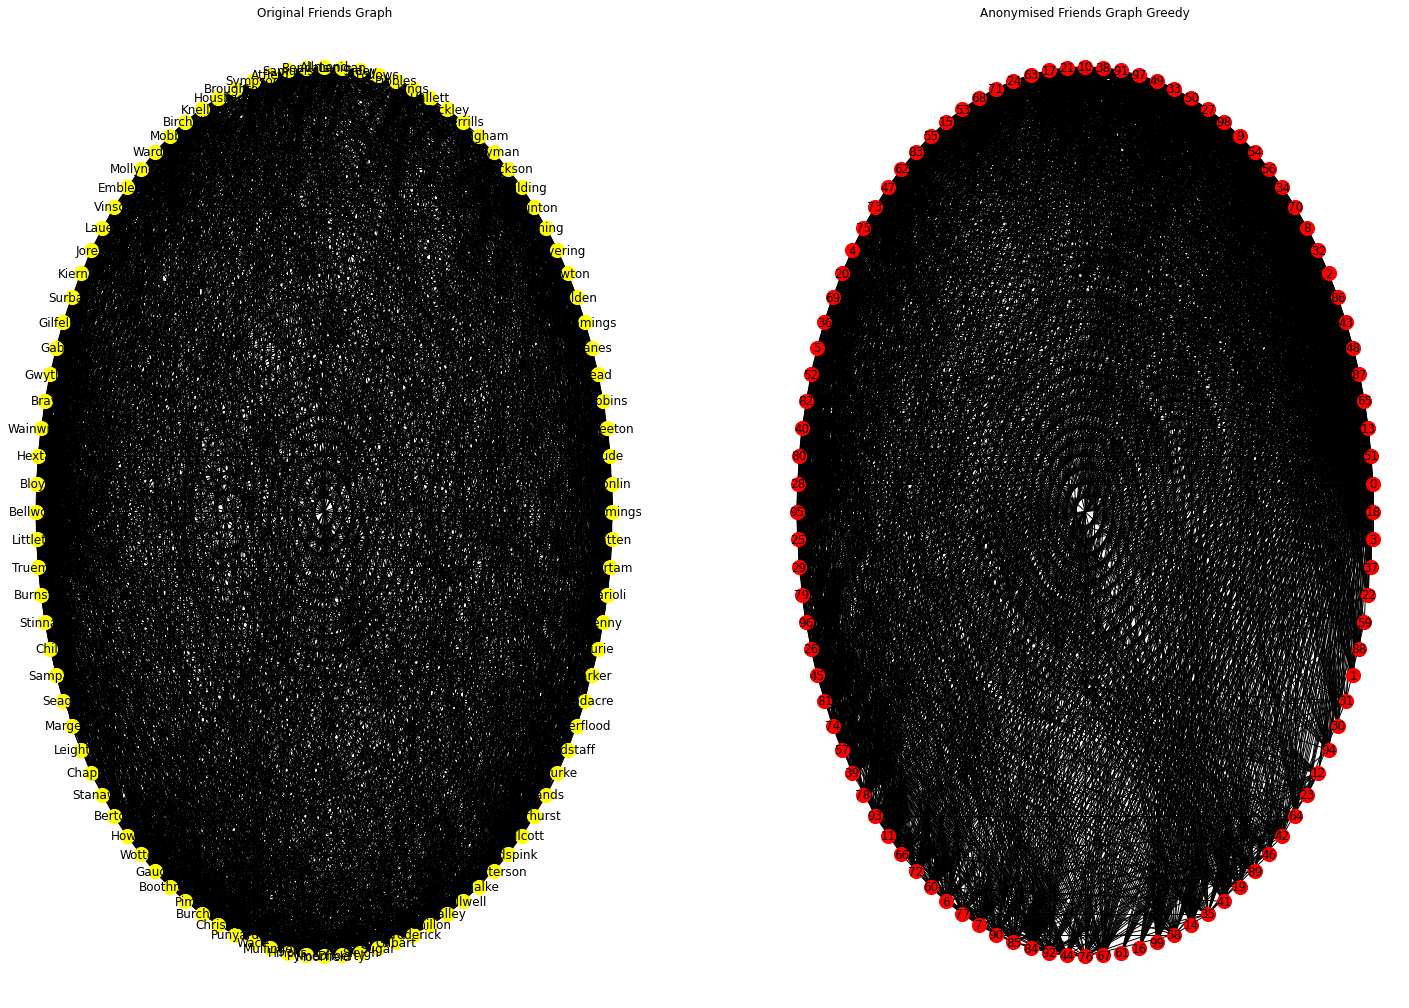

In [290]:
#Network diagram, Original precision Vs Annoymised data
plt.figure(figsize = (25,18))
plt.subplot(1, 2, 1)
nx.draw_circular(G,with_labels=True, node_size=200, node_color='yellow',)
plt.title("Original Friends Graph")
plt.subplot(1, 2, 2)
nx.draw_circular(gra_ph,with_labels=True, node_size=200, node_color='red',)    
plt.title("Anonymised Friends Graph Greedy")

With graph anonymisation sometimes edges are added and at times there are removed in our case edges were added. To verify this we can use neworkx's function nx.number_of_edges(G) to find out. When we run the function we get the following results. From the anonymised graph and the original graph. 

In [276]:
print("Number of edges in original friends graph = " + str(nx.number_of_edges(G)))
print("Num of edges in anonymised graph          = " + str(nx.number_of_edges(gra_ph)))

Number of edges in original friends graph = 2410
Num of edges in anonymised graph          = 2479


### Time Complexity of Greedy algorithm.
Investigate the effect of time as the amount of inputs increase and the degree of k also increases. In this case i am going to to use the barabasi_albert_graph from network x. 

In [187]:
import time

degs = []
time_co = []
no_degs = []
k_data = []
for i in range(100,2000,100):
    for k in range(2,10):
        k_data.append(k)
        G_time = nx.barabasi_albert_graph(i,6)
        degrees = [xa[1] for xa in G_time.degree()]
        degs.append(degrees)
        array_index2 = np.argsort(degrees)[::-1]
        array_deg2 = np.sort(degrees)[::-1]
        s_time = time.time()
        results = greedy(array_deg2,k,0,k)
        e_time = time.time()
        overall_time = e_time - s_time
        time_co.append(overall_time)
        no_degs.append(len(array_deg2))

Text(0.5, 1.0, 'Greedy algorithm degree behaviour with time as inputs increase.')

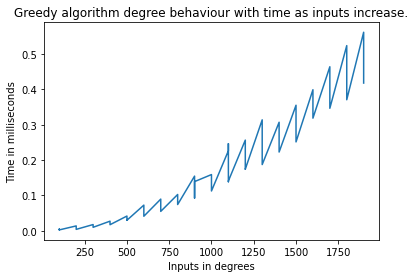

In [188]:
plt.plot(no_degs,time_co)
plt.ylabel("Time in milliseconds")
plt.xlabel("Inputs in degrees")
plt.title("Greedy algorithm degree behaviour with time as inputs increase.")

### Discusion on time Complexity. 
It appears that as the inputs increase, the more time it takes for the algorithm to run. This is kind of a normal behaviour on most algorithms.There are some ridges in the curve because there are two loops that are running at the same time. The graph that has been used to generate data as mentioned before is albert barabasi algorithm. The data is in 100 increaments.

### Dynamic Programming Solution. 

In [337]:
#Dynamic Programming Solution. 
def median(array_deg):
    result = len(array_deg)/2
    return result

def annony_price(a_array,b_array):
    price = 0
    for i, j in zip(a_array,b_array):
        price = price + (j-i)
    return price 
               
def combine(list_a):
    list_annoyn = [max(list_a)]*len(list_a)
    price = annony_price(list_a,list_annoyn)
    return price, list_annoyn    

def dynamic(k_deg, array_deg,mem=None):
    assert (k_deg > 0 and len(array_deg)>0), 'Enter right values'

    if mem is None:
        mem = {}
        
    results_price_degs = {}
    price = []
    degree_sec = []
    
    if k_deg == 1:
        return 0, array_get
    elif k_deg > median(array_deg):
        return combine(array_deg)
    else:
        results_price_degs.clear()
        max_t= len(array_deg) - k_deg+1
        min_t= k_deg # Not optimised
        
        for i in range(min_t,max_t):
            annoynm = array_deg[0: i]
            similar_g = array_deg[i: len(array_deg)]
            nodes = len(array_deg)
            if (i, len(array_deg)) in mem.keys():
                mem_data = mem.get((i, nodes))
                i_price, i_annoym_degs = mem_data[0], mem_data[1]
            else:
                price_anonym, degs_anonym = dynamic(k_deg, annoynm,mem)
                price_sim_g, sim_g_degs = combine(similar_g)
                i_price = price_anonym + price_sim_g
                i_annoym_degs = degs_anonym + sim_g_degs
                mem[(i, len(array_deg))] = (i_price, i_annoym_degs)
                
            degree_sec.append(i_annoym_degs) 
            price.append(i_price)   
            results_price_degs[i_price] = i_annoym_degs
            
        result = min(results_price_degs.items(), key = lambda x: x[0])
        return result


def dynamicOptimised(k_deg, array_deg,mem=None):
    assert (k_deg > 0 and len(array_deg)>0), 'Enter right values'

    if mem is None:
        mem = {}
        
    results_price_degs = {}
    price = []
    degree_sec = []
    
    if k_deg == 1:
        return 0, array_get
    elif k_deg > median(array_deg):
        return combine(array_deg)
    else:
        results_price_degs.clear()
        max_t= len(array_deg) - k_deg+1 
        min_t= max(k_deg, (len(array_deg) - 2*k_deg + 1)) #Optimised
        
        for i in range(min_t,max_t):
            annoynm = array_deg[0: i]
            similar_g = array_deg[i: len(array_deg)]
            nodes = len(array_deg)
            if (i, len(array_deg)) in mem.keys():
                mem_data = mem.get((i, nodes))
                i_price, i_annoym_degs = mem_data[0], mem_data[1]
            else:
                price_anonym, degs_anonym = dynamicOptimised(k_deg, annoynm,mem)
                price_sim_g, sim_g_degs = combine(similar_g)
                i_price = price_anonym + price_sim_g
                i_annoym_degs = degs_anonym + sim_g_degs
                mem[(i, len(array_deg))] = (i_price, i_annoym_degs)
        
            degree_sec.append(i_annoym_degs) 
            price.append(i_price)   
            results_price_degs[i_price] = i_annoym_degs  
        result = min(results_price_degs.items(), key = lambda x: x[0])
        return result

### Test the dynamic algorithm on the friends dataset.

In [343]:
#Original
array_deg

array([97, 97, 97, 97, 83, 83, 83, 83, 75, 75, 75, 75, 75, 75, 65, 65, 65,
       65, 64, 64, 64, 64, 64, 64, 62, 62, 62, 62, 62, 58, 58, 58, 58, 56,
       56, 56, 56, 56, 56, 53, 53, 53, 53, 53, 51, 51, 51, 51, 51, 49, 49,
       49, 49, 49, 49, 45, 45, 45, 45, 43, 43, 43, 43, 43, 41, 41, 41, 41,
       38, 38, 38, 38, 38, 38, 38, 38, 33, 33, 33, 33, 33, 30, 30, 30, 30,
       30, 25, 25, 25, 25, 17, 17, 17, 17, 17, 17, 12, 11, 10, 10])

In [280]:
#Annoymised with k_degree of 4
test_dynamic = dynamic(4, array_deg,mem=None)
np.array(test_dynamic[1])

array([97, 97, 97, 97, 83, 83, 83, 83, 75, 75, 75, 75, 75, 75, 65, 65, 65,
       65, 64, 64, 64, 64, 64, 64, 62, 62, 62, 62, 62, 58, 58, 58, 58, 56,
       56, 56, 56, 56, 56, 53, 53, 53, 53, 53, 51, 51, 51, 51, 51, 49, 49,
       49, 49, 49, 49, 45, 45, 45, 45, 43, 43, 43, 43, 43, 41, 41, 41, 41,
       38, 38, 38, 38, 38, 38, 38, 38, 33, 33, 33, 33, 33, 30, 30, 30, 30,
       30, 25, 25, 25, 25, 17, 17, 17, 17, 17, 17, 12, 12, 12, 12])

In [281]:
#Results 
results_ = np.array(test_dynamic[1])

In [285]:
#Test the dynamic Optimised algorithm
test_dynamic2 = dynamicOptimised(4, array_deg,mem=None)
dynamic2_graph_test = np.array(test_dynamic2[1])

In [286]:
#Construct the graph that has been annoymised witht the dynamic algorithm
gra_ph2 = construct_graph(array_index, dynamic2_graph_test)
gra_ph2

Text(0.5, 1.0, 'Anonymised Friends Graph Dynamic Optimised')

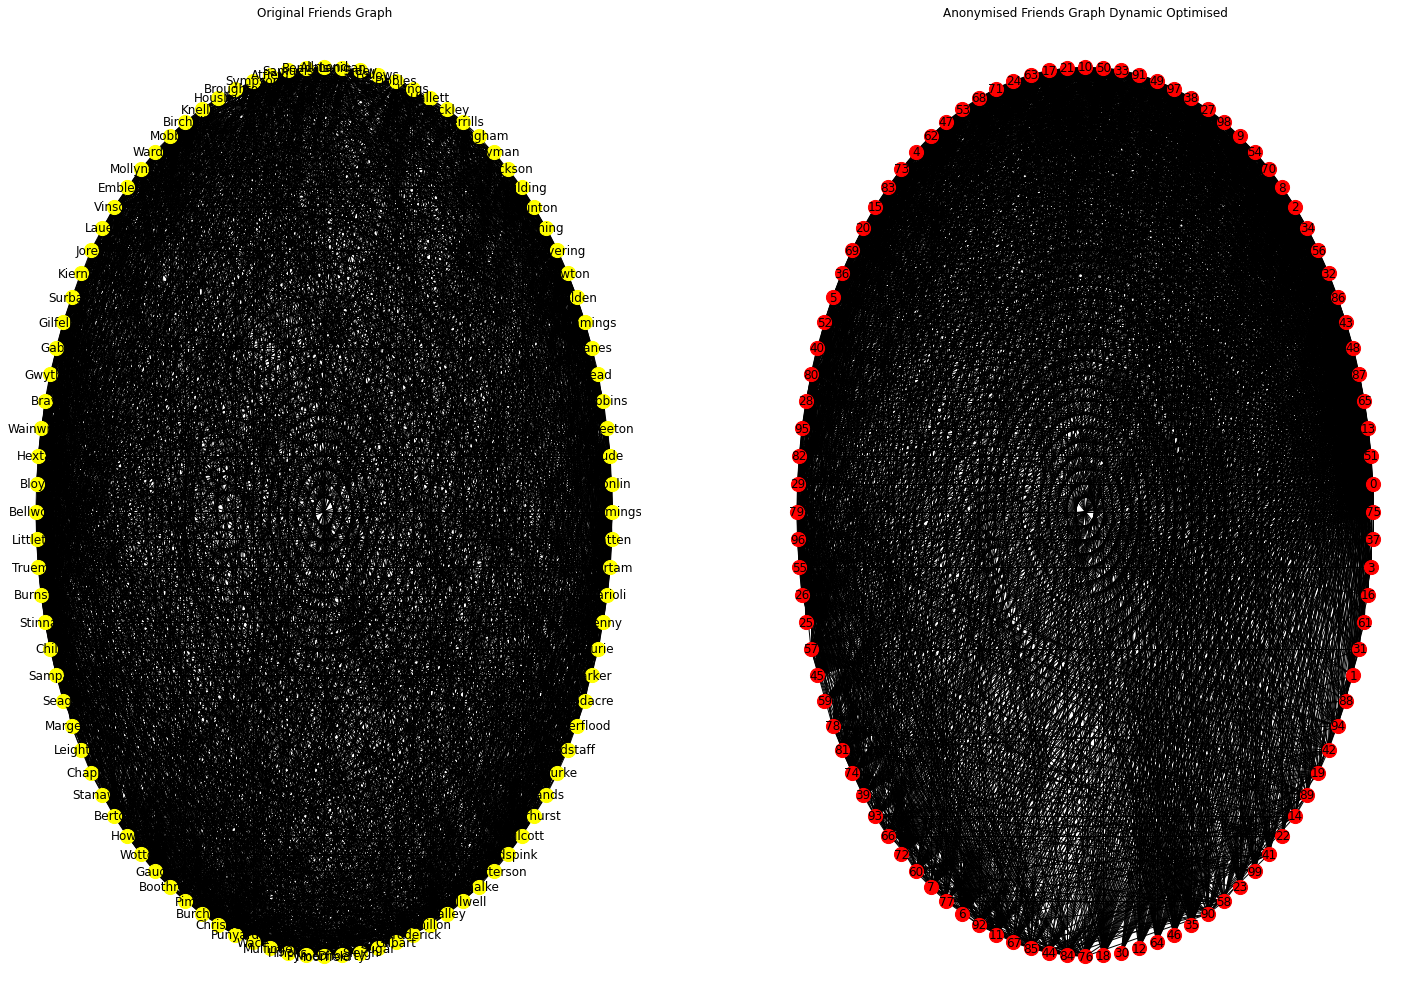

In [289]:
#Network diagram, Original precision Vs Annoymised
plt.figure(figsize = (25,18))
plt.subplot(1, 2, 1)
nx.draw_circular(G,with_labels=True, node_size=200, node_color='yellow',)
plt.title("Original Friends Graph")
plt.subplot(1, 2, 2)
nx.draw_circular(gra_ph2,with_labels=True, node_size=200, node_color='red',)    
plt.title("Anonymised Friends Graph Dynamic Optimised")

To show that anonymisation has been a sucess there have to be some structural changes in the graph. In this case the some of the changes that we can observe are in terms of the number of edges for the graph. The original graph had 2410 edges and the annoymised graph has 2467 edges.Other structural changes like transivity, closeness centrality, density etc have also changed in the annoymised dataset.

In [288]:
print("Number of edges in original friends graph = " + str(nx.number_of_edges(G)))
print("Num of edges in anonymised graph          = " + str(nx.number_of_edges(gra_ph2)))

Number of edges in original friends graph = 2410
Num of edges in anonymised graph          = 2467


### Test time complexity for the dynamic algorithm for both optimised and non optimised variants. , (Albert_Barabasi_Graph)
I will use the same data and process as i used for the greedy algorithm. 

In [226]:
degs = []
time_co = []
no_degs = []
k_data = []
for i in range(10,200,10):
    for k in range(2,10):
        k_data.append(k)
        G_time = nx.barabasi_albert_graph(i,3)
        degrees = [xa[1] for xa in G_time.degree()]
        degs.append(degrees)
        array_index2 = np.argsort(degrees)[::-1]
        array_deg2 = np.sort(degrees)[::-1]
        s_time = time.time()
        results = dynamic(k, array_deg2,mem=None)
        e_time = time.time()
        overall_time = e_time - s_time
        time_co.append(overall_time)
        no_degs.append(len(array_deg2))

Text(0.5, 1.0, 'Dynamic algorithm degree behaviour with time as inputs increase.')

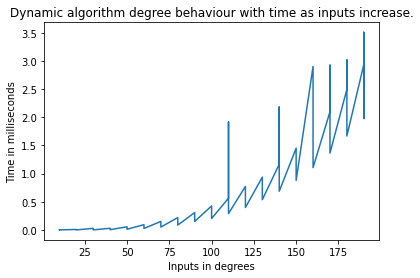

In [227]:
plt.plot(no_degs,time_co)
plt.ylabel("Time in milliseconds")
plt.xlabel("Inputs in degrees")
plt.title("Dynamic algorithm degree behaviour with time as inputs increase.")

In [233]:
degs = []
time_co = []
no_degs = []
k_data = []
for i in range(100,2000,100):
    for k in range(2,10):
        k_data.append(k)
        G_time = nx.barabasi_albert_graph(i,3)
        degrees = [xa[1] for xa in G_time.degree()]
        degs.append(degrees)
        array_index2 = np.argsort(degrees)[::-1]
        array_deg2 = np.sort(degrees)[::-1]
        s_time = time.time()
        results = dynamicOptimised(k, array_deg2,mem=None) 
        e_time = time.time()
        overall_time = e_time - s_time
        time_co.append(overall_time)
        no_degs.append(len(array_deg2))

Text(0.5, 1.0, 'Dynamic Optimised algorithm degree behaviour with time as inputs increase.')

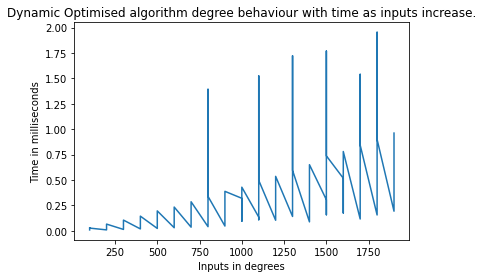

In [234]:
plt.plot(no_degs,time_co)
plt.ylabel("Time in milliseconds")
plt.xlabel("Inputs in degrees")
plt.title("Dynamic Optimised algorithm degree behaviour with time as inputs increase.")

### Discussion on time complexity of the dynamic optimised and non optimised variants of the algorithm. 
So the non optimized variant of the algorithm is pretty slow compared to the optimised version of the alogorithm. The non optimised version took a whole lot longer with just a few data points. To complete the whole cycle it took it 3.5seconds for just 200 data points. In comparison to the optimised version that took 2 seconds for 2000 data points. We can clearly tell that the optimised version is very fast compared to the non optimised version.

### Compare Greedy and Dynamic on the same dataset, (Albert_Barabasi_Graph). 

In [240]:
#Optimised Dynamic
degs = []
time_co = []
no_degs = []
k_data = []
for i in range(100,2000,100):
    for k in range(2,10):
        k_data.append(k)
        G_time = nx.barabasi_albert_graph(i,3)
        degrees = [xa[1] for xa in G_time.degree()]
        degs.append(degrees)
        array_index2 = np.argsort(degrees)[::-1]
        array_deg2 = np.sort(degrees)[::-1]
        s_time = time.time()
        results = dynamicOptimised(k, array_deg2,mem=None)
        e_time = time.time()
        overall_time = e_time - s_time
        time_co.append(overall_time)
        no_degs.append(len(array_deg2))

In [235]:
#Greedy Algorithm
degs1 = []
time_co1 = []
no_degs1 = []
k_data1 = []
for i in range(100,2000,100):
    for k in range(2,10):
        k_data1.append(k)
        G_time = nx.barabasi_albert_graph(i,3)
        degrees = [xa[1] for xa in G_time.degree()]
        degs1.append(degrees)
        array_index2 = np.argsort(degrees)[::-1]
        array_deg2 = np.sort(degrees)[::-1]
        s_time = time.time()
        results = greedy(array_deg2,k,0,k)
        e_time = time.time()
        overall_time = e_time - s_time
        time_co1.append(overall_time)
        no_degs1.append(len(array_deg2))

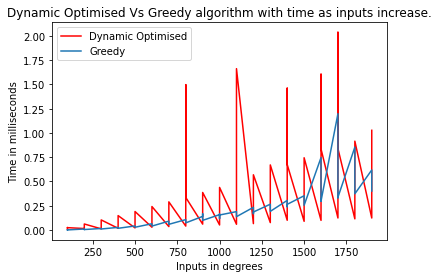

In [249]:
plt.plot(no_degs,time_co,color='red',label="Dynamic Optimised")
plt.plot(no_degs1,time_co1,label="Greedy")
plt.ylabel("Time in milliseconds")
plt.xlabel("Inputs in degrees")
plt.title("Dynamic Optimised Vs Greedy algorithm with time as inputs increase.")
plt.legend(loc="upper left")

In [247]:
print("Time in seconds for the Dynamic Optimised algo = " + str(sum(time_co)))
print("Time in seconds for the Greedy algo            = " + str(sum(time_co1)))

Time in seconds for the Dynamic Optimised algo = 43.95826172828674
Time in seconds for the Greedy algo            = 27.5326189994812


### Discussion on results from Greedy algorithm and Dynamic Programming. 
It appears that the greedy algorithm is faster than the Dynamic version. With the same dataset and conditions as the data points increased as well the execution time increased but not as much. At most it took the greedy algorithm under 1 second for the longest iteration compared to 2 seconds for the Dynamic algorithm. In total dynamic took 43.96 seconds compared to 27.53 seconds for the Greedy.